## Machine Learning - Ex.8


Submitted by: [Osnat Haj Yahia]

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### PCA


Implement the PCA algorithm as presented in class.

Input: 
1) a matrix ```X``` of size $n\times d$ (representing $n$ samples in $d$-dimensions) 
2) a parameter $k\leq d$ (the target's dimension).

Output: 
1) a matrix ```Z``` of size $n\times k$ (the reduced representation of the data)
2) a matrix ```U``` of size $d\times k$ (with the $k$ eigenvectors as its coloumns)
3) a vector ```evls``` of size $k$ (with the corresponding $k$ eigenvalues)

hint: use ```numpy.linalg.eig``` function


In [2]:
# your code here.. 

def PCA(X,k):
    mu = X.mean(axis=0)
    C = np.dot((X-mu).T,(X-mu))
    evls,U = np.linalg.eig(C)
    si = np.argsort(-evls)[:k]
    evls = evls[si]
    U = U[:,si]
    Z = (X-mu).dot(U)
    
    return Z, U, evls

### warm up: 2-D example

Load the data in: ```ex8_data1.csv```, and plot the sample points.

Use PCA to project the data into a 1-D representation: $$\vec{x_i}\in R^2\ \rightarrow\ z_i\in R$$

Project the values of $\{z_i\}$ back into 2-D (reconstruction): 
$$\hat{x_i}=z_i\cdot \vec{u_0}$$

and plot the reconstructed points together with the original points (use different colors).

Try to add small lines, between each point and its corresponding reconstruction.



[]

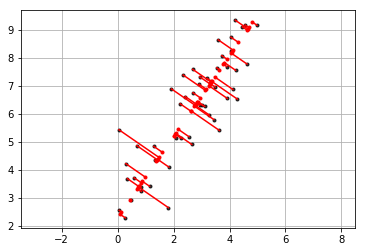

In [3]:
# your code here.. 

X = np.loadtxt('ex8_data1.csv', delimiter=',')
#X = X-X.mean(axis=0)
mu = X.mean(axis=0)

plt.plot(X[:,0],X[:,1],'.k',alpha=0.8)
plt.axis('equal')
plt.grid()

Z,U,evls = PCA(X,1)
X_hat = np.dot(Z,U.T) + X.mean(axis=0)
plt.plot(X_hat[:,0],X_hat[:,1],'.r')


plt.plot([X[:,0],X_hat[:,0]],[X[:,1],X_hat[:,1]],'r')
plt.axis('equal')

plt.plot()

### going higher: 8-D example

Load the data in: ```ex8_data2.csv``` and plot the data.
Can you see from the plot any underlying structure?


Next, plot the data using **all** the combinations of any two features, for examples:

- ```plt.plot(X[:,0],X[:,1],'.')```
- ```plt.plot(X[:,0],X[:,5],'.')```
- ```plt.plot(X[:,2],X[:,4],'.')```

(use a large figure with $8\times 8$ subplots..)

Can you see now any underlying structure?


Finally, use PCA to project the data into 2-D, and plot the results in the lower dimension:
- ```plt.plot(Z[:,0],Z[:,1],'.')```

Can you see now the underlying structure?


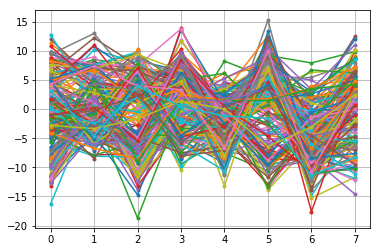

In [4]:
# your code here.. 

X=np.loadtxt('ex8_data2.csv', delimiter=',')

plt.plot(X.T,'.-')
plt.grid()
plt.show()

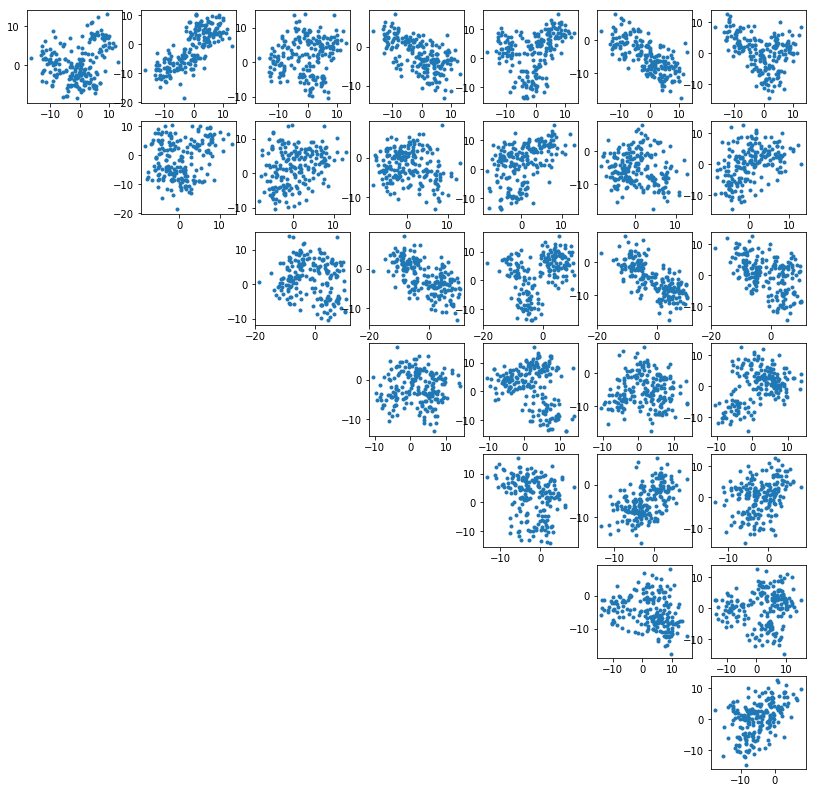

In [5]:
plt.figure(figsize=(16,16))

for i in range(8):
    for j in range(i+1,8):
        plt.subplot(8,8,i*8+j+1)
        plt.plot(X[:,i],X[:,j],'.')

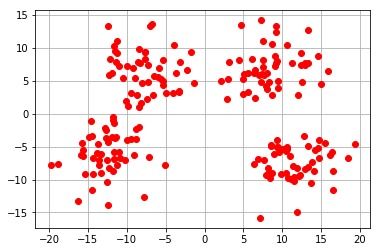

In [6]:
Z,U,evls = PCA(X,2)

plt.plot(Z[:,0],Z[:,1],'or')
plt.grid()

### and even higer: 64-D example

Use the DIGITS dataset (presented already in Ex.4).

Use PCA to project the data from 64-D to 2-D. 

1. Plot the results as points in 2-D. Use the given labels (0,1,..,9) to color the samples in different colors.

2. How much of the total variability (of the original data) is captured by this 2-D representation?

3. What is the minimal dimension $k$ needed to capture at least 80% of the original variability?

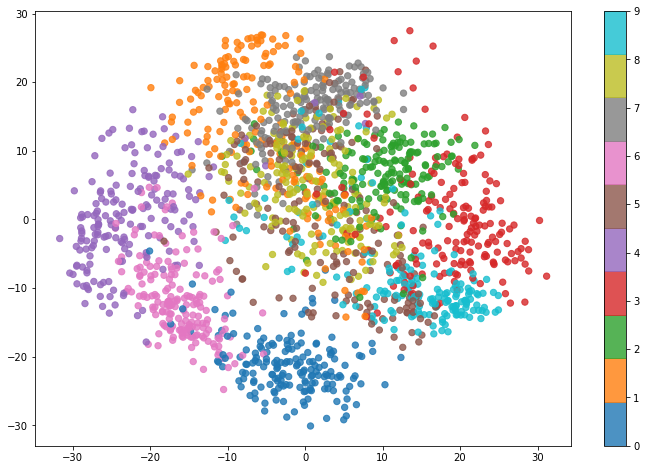

In [7]:
# your code here.. 

from sklearn import datasets
digits = datasets.load_digits() # load the dataset
X = digits.data
y = digits.target

Z,U,evls = PCA(X,2)

plt.figure(figsize=(12,8))
plt.scatter(Z[:,0], Z[:,1], s=40, c=y,cmap=plt.cm.tab10, alpha=0.8)
plt.colorbar()
plt.show()

## Good luck !